In [149]:
from sklearn.datasets import make_blobs
      
X, cluster_assignments = make_blobs(n_samples=200, centers=4, cluster_std=0.60, random_state=0)

In [150]:
X

array([[ 2.23421043e+00,  1.69349520e+00],
       [-1.05510724e+00,  2.63803080e+00],
       [ 1.08272576e+00,  4.06271877e+00],
       [-2.60159431e+00,  7.22195591e+00],
       [ 1.60841463e+00,  4.01800537e-01],
       [ 9.82570091e-01,  5.37530962e+00],
       [-1.71343572e+00,  2.97632236e+00],
       [ 4.43598630e-01,  3.11530945e+00],
       [ 1.71444449e+00,  5.02521524e+00],
       [ 1.41372442e+00,  4.38117707e+00],
       [ 5.95676822e-01,  4.08614263e+00],
       [ 2.43040639e+00, -6.35709334e-02],
       [-2.10047101e+00,  2.71029320e+00],
       [-2.45138222e+00,  2.95583946e+00],
       [ 3.20903274e+00,  1.78597253e+00],
       [ 1.86922139e+00,  5.44132083e+00],
       [-1.46707190e+00,  7.92948233e+00],
       [-1.25766504e+00,  7.93201692e+00],
       [-1.40889590e+00,  7.15865322e+00],
       [ 1.53853211e+00,  2.04370263e+00],
       [-1.68001841e+00,  7.34766422e+00],
       [-8.35505074e-01,  3.56565342e+00],
       [ 1.84287117e+00,  7.26928839e-02],
       [-1.

In [151]:
X.shape

(200, 2)

In [152]:
cluster_assignments

array([1, 2, 0, 3, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 1, 0, 3, 3, 3, 1, 3, 2,
       1, 2, 1, 1, 3, 1, 1, 0, 3, 0, 2, 1, 2, 0, 2, 0, 0, 3, 3, 3, 3, 0,
       1, 2, 0, 3, 3, 0, 3, 2, 2, 3, 0, 3, 2, 1, 0, 1, 3, 0, 1, 0, 3, 0,
       1, 3, 2, 2, 1, 1, 0, 0, 2, 3, 2, 2, 1, 1, 3, 0, 1, 2, 2, 0, 0, 1,
       2, 2, 3, 3, 3, 0, 0, 1, 2, 3, 0, 0, 3, 1, 1, 3, 3, 2, 0, 1, 1, 0,
       3, 2, 2, 1, 1, 0, 2, 2, 3, 0, 3, 2, 0, 1, 0, 2, 0, 2, 1, 0, 2, 1,
       2, 3, 3, 2, 3, 3, 1, 3, 1, 2, 1, 1, 2, 1, 0, 1, 2, 3, 3, 3, 0, 2,
       1, 0, 3, 2, 3, 1, 3, 1, 1, 2, 2, 3, 0, 1, 1, 2, 1, 0, 2, 3, 3, 3,
       0, 0, 2, 0, 2, 1, 0, 1, 0, 2, 2, 3, 0, 3, 1, 1, 0, 3, 2, 2, 2, 0,
       3, 1])

In [153]:
import numpy as np

class KMeans:
    
    def __init__(self, k=5, max_iterations=100):
        self.k = k
        self.max_iterations = max_iterations
        
    def fit(self, X):
        n_samples, n_features = X.shape
        self.centroids = np.zeros((self.k, n_features))
        
        # randomly initialize centroids
        for i in range(self.k):
            centroid = X[np.random.choice(range(n_samples))]
            self.centroids[i] = centroid
        
        # start the loop to update centroids
        for iteration in range(self.max_iterations):
            # initialize the clusters
            clusters = np.zeros(n_samples)
            
            # find the nearest centroid for each sample
            for i in range(n_samples):
                sample = X[i]
                distances = np.zeros(self.k)
                for j in range(self.k):
                    centroid = self.centroids[j]
                    # calculate euclidean distance
                    distances[j] = np.linalg.norm(sample - centroid)
                cluster = np.argmin(distances)
                clusters[i] = cluster
                
            # update the centroids based on the mean of the assigned samples
            for j in range(self.k):
                cluster_samples = X[clusters == j]
                self.centroids[j] = np.mean(cluster_samples, axis=0)
        
        return clusters, self.centroids



In [154]:
X_train, true_labels = make_blobs(n_samples=100, centers=4, random_state=42)
X_train = StandardScaler().fit_transform(X_train)

# Fit centroids to dataset
kmeans = KMeans(k=4)
kmeans.fit(X_train)



(array([1., 3., 0., 3., 1., 3., 2., 2., 2., 0., 0., 3., 3., 2., 0., 1., 1.,
        2., 1., 1., 0., 1., 1., 2., 2., 0., 2., 1., 1., 3., 3., 2., 3., 1.,
        0., 0., 0., 0., 2., 2., 1., 2., 3., 0., 0., 3., 3., 1., 1., 2., 2.,
        2., 2., 3., 1., 1., 0., 0., 2., 0., 3., 2., 1., 3., 1., 1., 3., 1.,
        2., 3., 2., 3., 1., 0., 3., 1., 3., 1., 3., 3., 2., 3., 0., 1., 0.,
        0., 0., 3., 0., 2., 2., 3., 0., 3., 0., 0., 0., 2., 1., 2.]),
 array([[ 0.15869202,  0.94464134],
        [-1.02898679,  0.75183326],
        [ 1.53665721, -0.13965038],
        [-0.66636245, -1.55682422]]))

In [155]:
# Cannonical K Means implementation

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn import preprocessing
# import plotly.express as px
from sklearn.datasets import make_blobs
plt.style.use('dark_background')

class cluster:

    def __init__(self, K=5, max_iterations=100):
        self.K = K
        self.max_iterations = max_iterations
    
    def initialize_random_centroids(self, X, num_features, num_examples):
        centroids = np.zeros((self.K, num_features)) # row , column full with zero 
        for k in range(self.K): # iterations of 
            centroid = X[np.random.choice(range(num_examples))] # random centroids
            centroids[k] = centroid
        return centroids # return random centroids
    
    # create cluster Function
    def create_cluster(self, X, centroids, num_features, num_examples):
        clusters = [[] for _ in range(self.K)]
        for point_idx, point in enumerate(X):
            closest_centroid = np.argmin(
                np.sqrt(np.sum((point-centroids)**2, axis=1))
            ) # closest centroid using euler distance equation(calculate distance of every point from centroid)
            clusters[closest_centroid].append(point_idx)
        return clusters 
    
    # new centroids
    def calculate_new_centroids(self, cluster, X, num_features, num_examples):
        centroids = np.zeros((self.K, num_features)) # row , column full with zero
        for idx, cluster in enumerate(cluster):
            new_centroid = np.mean(X[cluster], axis=0) # find the value for new centroids
            centroids[idx] = new_centroid
        return centroids
    
    # prediction
    def predict_cluster(self, clusters, X, num_features, num_examples):
        y_pred = np.zeros(num_examples) # row1 fillup with zero
        for cluster_idx, cluster in enumerate(clusters):
#             print(cluster)
            for sample_idx in cluster:
                
                y_pred[sample_idx] = cluster_idx
        return y_pred
     
    def fit(self, X):
        num_examples, num_features = X.shape
        centroids = self.initialize_random_centroids(X, num_features, num_examples) # initialize random centroids
        for _ in range(self.max_iterations):
            clusters = self.create_cluster(X, centroids, num_features, num_examples) # create cluster
            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters, X, num_features, num_examples) # calculate new centroids
            diff = centroids - previous_centroids # calculate difference
            if not diff.any():
                break
        y_pred = self.predict_cluster(clusters, X, num_features, num_examples) # predict function

        return y_pred, centroids

In [156]:
kmeans = cluster(K=4, max_iterations=100)
y_pred = kmeans.fit(X)
y_pred

(array([1., 3., 0., 2., 1., 0., 3., 0., 0., 0., 0., 1., 3., 3., 1., 0., 2.,
        2., 2., 1., 2., 3., 1., 3., 1., 1., 2., 1., 1., 0., 2., 0., 3., 1.,
        3., 0., 3., 0., 0., 2., 2., 2., 2., 0., 1., 3., 0., 2., 2., 0., 2.,
        3., 3., 2., 0., 2., 3., 1., 0., 1., 2., 0., 1., 0., 2., 0., 1., 2.,
        3., 3., 1., 1., 0., 0., 3., 2., 3., 3., 1., 1., 2., 0., 1., 3., 3.,
        0., 0., 1., 3., 3., 2., 2., 2., 0., 0., 1., 3., 2., 0., 0., 2., 1.,
        1., 2., 2., 3., 0., 1., 1., 0., 2., 3., 3., 1., 1., 0., 3., 3., 2.,
        0., 2., 3., 0., 1., 0., 3., 0., 3., 1., 0., 3., 1., 3., 2., 2., 3.,
        2., 2., 1., 2., 1., 3., 1., 1., 3., 1., 0., 1., 3., 2., 2., 2., 0.,
        3., 1., 0., 2., 3., 2., 1., 2., 1., 1., 3., 3., 2., 0., 1., 1., 3.,
        1., 0., 3., 2., 2., 2., 0., 0., 3., 0., 3., 1., 0., 1., 0., 3., 3.,
        2., 0., 2., 1., 1., 0., 2., 3., 3., 3., 0., 2., 1.]),
 array([[ 0.90793962,  4.35713791],
        [ 2.07187892,  0.97422926],
        [-1.34842715,  7.72096

In [157]:
# Extended K Means implementation

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn import preprocessing
# import plotly.express as px
from sklearn.datasets import make_blobs
plt.style.use('dark_background')

class cluster:

    def __init__(self, K=5, max_iterations=100, balanced = False):
        self.K = K
        self.max_iterations = max_iterations
        self.balanced = balanced
    
    def initialize_random_centroids(self, X, num_features, num_examples):
        centroids = np.zeros((self.K, num_features)) # row , column full with zero ,eg 4X2
        for k in range(self.K): # iterations of 
            centroid = X[np.random.choice(range(num_examples))] # random centroids
            centroids[k] = centroid
        return centroids # return random centroids
    
    # create cluster Function
    def create_cluster(self, X, centroids, num_features, num_examples):
        clusters = [[] for _ in range(self.K)]
        for point_idx, point in enumerate(X):
            closest_centroid = np.argmin(np.sqrt(np.sum((point-centroids)**2, axis=1))) # closest centroid using euler distance equation(calculate distance of every point from centroid)
            clusters[closest_centroid].append(point_idx)
        return clusters 
    
    # new centroids
    def calculate_new_centroids(self, cluster, X, num_features, num_examples):
        centroids = np.zeros((self.K, num_features)) # row , column full with zero
        for idx, cluster in enumerate(cluster):
            new_centroid = np.mean(X[cluster], axis=0) # find the value for new centroids
            centroids[idx] = new_centroid
        return centroids
    
    # prediction
    def predict_cluster(self, clusters, X, num_features, num_examples):
        y_pred = np.zeros(num_examples) # row1 fillup with zero
        for cluster_idx, cluster in enumerate(clusters):
#             print(cluster)
            for sample_idx in cluster:
                
                y_pred[sample_idx] = cluster_idx
        return y_pred
     
    def fit(self, X):
        
        if self.balanced:
            pass
        else:
            num_examples, num_features = X.shape #200,2
            centroids = self.initialize_random_centroids(X, num_features, num_examples) # initialize random centroids
            for _ in range(self.max_iterations):
                clusters = self.create_cluster(X, centroids, num_features, num_examples) # create cluster
#                 print(clusters)
                previous_centroids = centroids
                centroids = self.calculate_new_centroids(clusters, X, num_features, num_examples) # calculate new centroids
                diff = centroids - previous_centroids # calculate difference
                if not diff.any():
                    break
            y_pred = self.predict_cluster(clusters, X, num_features, num_examples) # predict function

            return y_pred, centroids

In [158]:
kmeans = cluster(K=4, max_iterations=100)
y_pred = kmeans.fit(X)
y_pred

(array([2., 3., 3., 1., 2., 3., 3., 3., 3., 3., 3., 2., 3., 3., 2., 3., 1.,
        0., 0., 2., 1., 3., 2., 3., 2., 2., 0., 2., 2., 3., 0., 3., 3., 2.,
        3., 3., 3., 3., 3., 1., 0., 0., 0., 3., 2., 3., 3., 1., 0., 3., 0.,
        3., 3., 1., 2., 0., 3., 2., 3., 2., 1., 3., 2., 3., 0., 3., 2., 1.,
        3., 3., 2., 2., 3., 3., 3., 0., 3., 3., 2., 2., 1., 3., 2., 3., 3.,
        3., 3., 2., 3., 3., 0., 1., 1., 3., 3., 2., 3., 0., 2., 3., 0., 2.,
        2., 0., 0., 3., 3., 2., 2., 3., 1., 3., 3., 2., 2., 3., 3., 3., 0.,
        3., 1., 3., 3., 2., 3., 3., 3., 3., 2., 3., 3., 2., 3., 0., 0., 3.,
        0., 1., 2., 0., 2., 3., 2., 2., 3., 2., 3., 2., 3., 1., 1., 0., 3.,
        3., 2., 3., 1., 3., 0., 2., 1., 2., 2., 3., 3., 0., 3., 2., 2., 3.,
        2., 3., 3., 0., 1., 0., 3., 3., 3., 3., 3., 2., 3., 2., 3., 3., 3.,
        1., 3., 0., 2., 2., 3., 0., 3., 3., 3., 3., 0., 2.]),
 array([[-1.01162675,  7.56745451],
        [-1.85362775,  7.95123194],
        [ 2.07765826,  1.06995

In [214]:
import pandas as pd

df = pd.read_csv('historical-weather.csv')
df

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,100,2011-09-10 01:40:49,911.8,62.96,95.0,2.3,106.0,2.5,88.0,1.9,0.0,0.0,63.9
2,200,2011-09-10 03:20:49,911.4,68.00,53.0,0.3,69.0,0.5,19.0,0.2,0.0,0.0,33.4
3,300,2011-09-10 05:00:49,911.4,64.22,191.0,2.8,197.0,2.9,185.0,2.6,0.0,0.0,58.2
4,400,2011-09-10 06:40:49,912.2,52.70,181.0,1.5,191.0,2.0,164.0,1.2,0.0,0.0,89.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15868,1586800,2014-09-10 16:23:29,914.3,77.18,225.0,5.2,238.0,6.0,214.0,4.4,0.0,0.0,43.2
15869,1586900,2014-09-10 18:03:29,914.4,77.00,190.0,1.5,196.0,1.7,185.0,1.4,0.0,0.0,42.8
15870,1587000,2014-09-10 19:43:29,914.9,75.92,344.0,0.4,352.0,0.6,336.0,0.3,0.0,0.0,43.9
15871,1587100,2014-09-10 21:23:29,915.7,75.38,13.0,1.5,24.0,1.7,4.0,1.2,0.0,0.0,46.7


In [215]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
# fig, ax = plt.subplots(facecolor='w')
# ax.plot([1,2])
# %matplotlib inline

In [216]:
del df['rain_accumulation']
del df['rain_duration']

In [217]:
before_rows = df.shape[0]
df=df.dropna()
after_rows= df.shape[0]

In [218]:
before_rows-after_rows

3

In [219]:
df.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

In [220]:
features=['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 'max_wind_speed', 'relative_humidity']

In [221]:
df=df[features]

In [222]:
df.columns

Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_direction', 'max_wind_speed', 'relative_humidity'],
      dtype='object')

In [223]:
df

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,106.0,1.6,60.5
1,911.8,62.96,95.0,2.3,106.0,2.5,63.9
2,911.4,68.00,53.0,0.3,69.0,0.5,33.4
3,911.4,64.22,191.0,2.8,197.0,2.9,58.2
4,912.2,52.70,181.0,1.5,191.0,2.0,89.8
...,...,...,...,...,...,...,...
15868,914.3,77.18,225.0,5.2,238.0,6.0,43.2
15869,914.4,77.00,190.0,1.5,196.0,1.7,42.8
15870,914.9,75.92,344.0,0.4,352.0,0.6,43.9
15871,915.7,75.38,13.0,1.5,24.0,1.7,46.7


In [224]:
X = StandardScaler().fit_transform(df)
X

array([[-1.48430824,  0.24526764, -0.67450862, ..., -0.61453318,
        -0.74711905,  0.49291641],
       [-1.64815855,  0.09316977, -0.69549274, ..., -0.61453318,
        -0.37657025,  0.62274263],
       [-1.77923879,  0.5190438 , -1.13615931, ..., -1.01554462,
        -1.20001203, -0.54187493],
       ...,
       [-0.63228666,  1.18827442,  1.91703046, ...,  2.051651  ,
        -1.15883994, -0.14094102],
       [-0.37012617,  1.14264506, -1.55584175, ..., -1.50326124,
        -0.70594696, -0.03402531],
       [-0.30458605,  1.17306463,  1.82260191, ...,  2.00829841,
        -0.9529795 ,  0.00797729]])

In [225]:
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X)
model

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=12)

In [226]:
centers = model.cluster_centers_
centers

array([[-0.21325167,  0.63361917,  0.42301406,  0.73654008,  0.53448925,
         0.67603565, -0.15168006],
       [ 0.13019503,  0.8482683 ,  1.41288977, -0.65305744,  1.68407514,
        -0.61269553, -0.72776216],
       [ 1.38130392, -0.07975493, -1.19905297, -0.00474798, -1.0692502 ,
         0.01984686, -0.99478634],
       [-0.87916906, -1.18978338,  0.37560282,  0.28564447,  0.49049384,
         0.27929149,  1.35998597],
       [ 0.73937446,  0.38634951,  0.29878718, -0.51742536,  0.48480621,
        -0.52484669, -0.76585068],
       [ 1.18944493, -0.26818101, -1.14083034,  2.19927774, -1.04333663,
         2.31822376, -1.1382664 ],
       [-1.15253418, -0.89439407,  0.44948505,  1.94273424,  0.54470618,
         1.9040121 ,  0.93152799],
       [ 0.08150342, -0.7743352 , -1.18176749, -0.57765543, -1.03056728,
        -0.5873674 ,  0.85903588],
       [ 0.20912556,  0.31381522,  1.90285586, -0.64961895, -1.53823517,
        -0.5763888 , -0.273904  ],
       [-0.1410207 ,  0.8525

In [227]:
def pd_centers(featuresUsed, centers):
    colNames = list(featuresUsed)
    colNames.append('prediction')

    # Zip with a column called 'prediction' (index)
    Z = [np.append(A, index) for index, A in enumerate(centers)]

    # Convert to pandas data frame for plotting
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P

In [228]:
def parallel_plot(data):
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
    plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
    parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [229]:
P = pd_centers(features, centers)
P

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,prediction
0,-0.213252,0.633619,0.423014,0.736540,0.534489,0.676036,-0.151680,0
1,0.130195,0.848268,1.412890,-0.653057,1.684075,-0.612696,-0.727762,1
2,1.381304,-0.079755,-1.199053,-0.004748,-1.069250,0.019847,-0.994786,2
3,-0.879169,-1.189783,0.375603,0.285644,0.490494,0.279291,1.359986,3
4,0.739374,0.386350,0.298787,-0.517425,0.484806,-0.524847,-0.765851,4
5,1.189445,-0.268181,-1.140830,2.199278,-1.043337,2.318224,-1.138266,5
6,-1.152534,-0.894394,0.449485,1.942734,0.544706,1.904012,0.931528,6
7,0.081503,-0.774335,-1.181767,-0.577655,-1.030567,-0.587367,0.859036,7
8,0.209126,0.313815,1.902856,-0.649619,-1.538235,-0.576389,-0.273904,8
9,-0.141021,0.852539,-1.303141,-0.587130,-1.162616,-0.600753,-0.643812,9


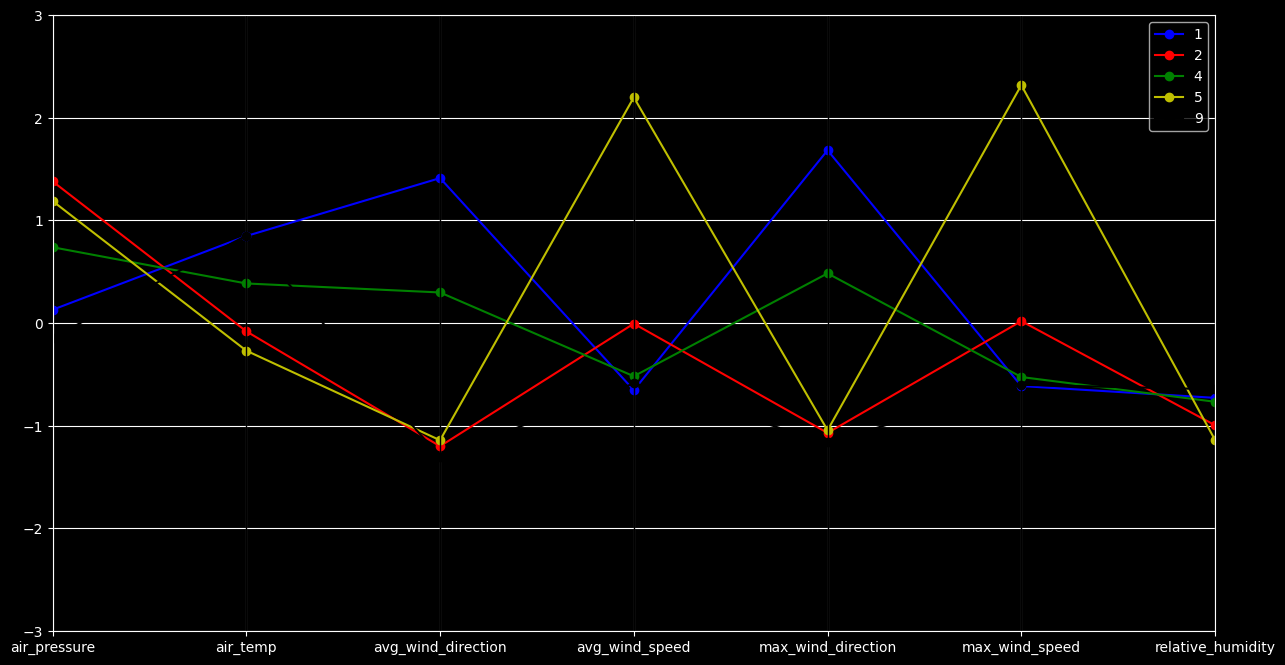

In [230]:
parallel_plot(P[P['relative_humidity'] < -0.5])

In [137]:
np.unique(y_pred[0], return_counts=True)

(array([0., 1., 2., 3.]), array([50, 50, 50, 50]))

Extend K Means

In [298]:
from sklearn.datasets import make_blobs
      
X, cluster_assignments = make_blobs(n_samples=200, centers=4, cluster_std=0.60, random_state=0)

In [309]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
plt.style.use('dark_background')

class cluster:

    def __init__(self, K=5, max_iterations=100, balanced = False):
        self.K = K
        self.max_iterations = max_iterations
        self.balanced = balanced
    
    def initialize_random_centroids(self, X, num_features, num_examples):
        if self.balanced:
            centroids = np.zeros((self.K, num_features))
            for k in range(self.K):
                centroid = X[np.random.choice(range(num_examples))]
                centroids[k] = centroid
        else:
            step = int(num_examples / self.K)
            indices = np.arange(0, num_examples, step)
            centroids = X[indices]
        return centroids
    
    def create_cluster(self, X, centroids, num_features, num_examples):
        clusters = [[] for _ in range(self.K)]
        for point_idx, point in enumerate(X):
            closest_centroid = np.argmin(
                np.sqrt(np.sum((point-centroids)**2, axis=1))
            )
            clusters[closest_centroid].append(point_idx)
        return clusters 
    
    def calculate_new_centroids(self, cluster, X, num_features, num_examples):
        centroids = np.zeros((self.K, num_features))
        for idx, cluster in enumerate(cluster):
            new_centroid = np.mean(X[cluster], axis=0)
            centroids[idx] = new_centroid
        return centroids
    
    def predict_cluster(self, clusters, X, num_features, num_examples):
        y_pred = np.zeros(num_examples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx
        return y_pred
     
    def fit(self, X):
        num_examples, num_features = X.shape
        centroids = self.initialize_random_centroids(X, num_features, num_examples)
        for _ in range(self.max_iterations):
            clusters = self.create_cluster(X, centroids, num_features, num_examples)
            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters, X, num_features, num_examples)
            diff = centroids - previous_centroids
            if not diff.any():
                break
        y_pred = self.predict_cluster(clusters, X, num_features, num_examples) # predict function
        
        return y_pred, centroids
        
kmeans = cluster(K=4, max_iterations=100, balanced = False)
y_pred = kmeans.fit(X)
y_pred

(array([0., 2., 2., 3., 0., 2., 2., 2., 2., 2., 2., 0., 2., 2., 0., 2., 1.,
        1., 3., 0., 3., 2., 0., 2., 0., 0., 1., 0., 0., 2., 1., 2., 2., 0.,
        2., 2., 2., 2., 2., 3., 1., 1., 1., 2., 0., 2., 2., 3., 3., 2., 1.,
        2., 2., 1., 0., 3., 2., 0., 2., 0., 3., 2., 0., 2., 1., 2., 0., 3.,
        2., 2., 0., 0., 2., 2., 2., 1., 2., 2., 0., 0., 1., 2., 0., 2., 2.,
        2., 2., 0., 2., 2., 1., 1., 3., 2., 2., 0., 2., 3., 0., 2., 1., 0.,
        0., 3., 1., 2., 2., 0., 0., 2., 1., 2., 2., 0., 0., 2., 2., 2., 3.,
        2., 1., 2., 2., 0., 2., 2., 2., 2., 0., 2., 2., 0., 2., 1., 1., 2.,
        1., 1., 0., 1., 0., 2., 0., 0., 2., 0., 2., 0., 2., 3., 1., 3., 2.,
        2., 0., 2., 3., 2., 1., 0., 3., 0., 0., 2., 2., 1., 2., 0., 0., 2.,
        0., 2., 2., 1., 3., 1., 2., 2., 2., 2., 2., 0., 2., 0., 2., 2., 2.,
        3., 2., 1., 0., 0., 2., 1., 2., 2., 2., 2., 1., 0.]),
 array([[ 2.07765826,  1.06995698],
        [-1.02296068,  7.8977643 ],
        [-0.41069398,  3.64008

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/pyplot.py'>

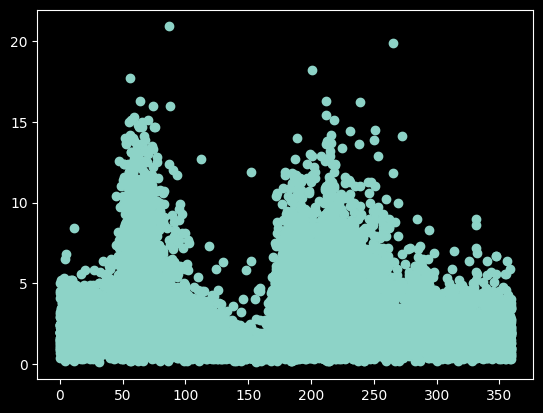

In [314]:
plt.scatter(df['max_wind_direction'], df['max_wind_speed'])
plt

In [310]:
np.unique(y_pred[0], return_counts=True)

(array([0., 1., 2., 3.]), array([52, 31, 98, 19]))

In [ ]:
def pd_centers(featuresUsed, centers):
    colNames = list(featuresUsed)
    colNames.append('prediction')

    # Zip with a column called 'prediction' (index)
    Z = [np.append(A, index) for index, A in enumerate(centers)]

    # Convert to pandas data frame for plotting
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P

In [ ]:
def parallel_plot(data):
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
    plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
    parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

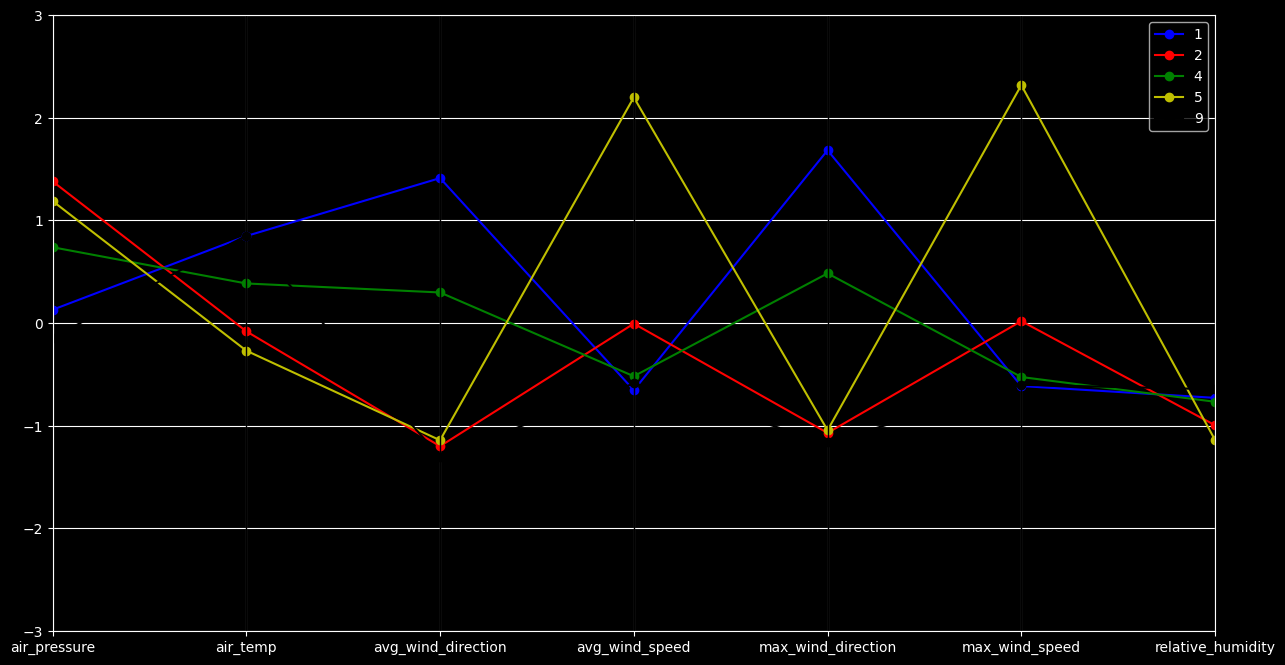

In [311]:
parallel_plot(P[P['relative_humidity'] < -0.5])